In [1]:
%matplotlib inline
%run 'bin/notebook_utils.py'
import matplotlib.ticker as mticker

In [2]:
# Single subagent, ssh comm method, manually increased processes PRRTE
exp4_sessions = pd.read_csv('../data/exp4/sessions.csv', index_col=0)
exp4_pilots = pd.read_csv('../data/exp4/pilots.csv', index_col=0)
exp4_units = pd.read_csv('../data/exp4/units.csv', index_col=0)

# 4 subagents, ssh comm method, manually increased processes PRRTE, 0.001s delat
exp5_sessions = pd.read_csv('../data/exp5/sessions.csv', index_col=0)
exp5_pilots = pd.read_csv('../data/exp5/pilots.csv', index_col=0)
exp5_units = pd.read_csv('../data/exp5/units.csv', index_col=0)

In [3]:
print 'Experiment 4: Baseline: Total number of successful runs: %s' % exp4_sessions.shape[0]
print 'Experiment 4: Baseline: Total number of pilots: %s' % exp4_pilots.shape[0]
print 'Experiment 4: Baseline: Total number of units: %s\n' % exp4_units.shape[0]

print 'Experiment 5: Baseline: Total number of successful runs: %s' % exp5_sessions.shape[0]
print 'Experiment 5: Baseline: Total number of pilots: %s' % exp5_pilots.shape[0]
print 'Experiment 5: Baseline: Total number of units: %s\n' % exp5_units.shape[0]

Experiment 4: Baseline: Total number of successful runs: 11
Experiment 4: Baseline: Total number of pilots: 11
Experiment 4: Baseline: Total number of units: 65536

Experiment 5: Baseline: Total number of successful runs: 1
Experiment 5: Baseline: Total number of pilots: 1
Experiment 5: Baseline: Total number of units: 16384



In [4]:
exp4_sessions.loc[exp4_sessions.ncore == 84, 'ncore'] = 168
exp4_sessions['nnode'] = exp4_sessions.ncore/168
exp4_sessions['nnode'] = exp4_sessions['nnode'].apply(np.ceil)
exp4_sessions['list'] = exp4_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp4_sessions['nunitnode'] = exp4_sessions['list'].apply('/'.join)

exp4_ws = exp4_sessions[
    ['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
     'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
     'cu_exec_start_stop','nunit_failed','util_p_total']].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std'],
                 'util_p_total'        : ['mean','std'],
                 'nunit_failed'        : ['mean']
                })

exp4_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp4_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)
exp4_ws.rename({'util_p_total'        :'TTX'}, axis='columns', inplace=True)

exp4_ws = exp4_ws.sort_values("nunit")
exp4_ws

TTQ              nunit_failed          TTX                       TTC                Agent scheduling               TTX Unit            Agent queueing           Agent queueing execution               TTX Agent           
                        mean          std         mean         mean         std          mean            std             mean       std         mean        std           mean       std                     mean        std         mean        std
nunit nunitnode                                                                                                                                                                                                                                     
1024  1024/26      62.138335     2.044089            0  1262.774100  228.521638  1.565891e+09    1197.888502         3.525402  1.112794  1029.523494  12.450692       6.074605  3.846145               129.496681  12.371917  1029.799317  12.386044
2048  2048/51    3321.691144  1797.622708            0  1290.376667   35.849751  1.566122e+09  201015.599012         6.917727  0.053415  1177.496137   1.836337       8.171157  0.105839               277.404578   1.828776  1177.697757   1.834351
4096  4096/101   1107.280731   389.605431            0  1533.592650    3.323190  1.566283e+09   24858.873702        18.923690  0.015265  1453.791537   0.995575      21.416204  0.161790               553.672961   0.968872  1454.006711   1.004316
8192  8192/202   1073.793338  1410.478176            0  2096.037950    3.075844  1.565890e+09    1390.698726        58.958676  0.181679  2015.041753   0.903093      63.883618  0.104586              1114.864786   0.920683  2015.256482   0.889548
16384 16384/410  7640.860945  3835.525718            0  3235.952600    8.007843  1.566395e+09   20380.394312       205.294122  6.426163  3127.766465   7.847302     215.039598  6.690071              2227.418262   7.845788  3127.977219   7.847944

In [5]:
exp5_sessions.loc[exp5_sessions.ncore == 84, 'ncore'] = 168
exp5_sessions['nnode'] = exp5_sessions.ncore/168
exp5_sessions['nnode'] = exp5_sessions['nnode'].apply(np.ceil)
exp5_sessions['list'] = exp5_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp5_sessions['nunitnode'] = exp5_sessions['list'].apply('/'.join)

exp5_ws = exp5_sessions[
    ['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
     'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
     'cu_exec_start_stop','nunit_failed','util_p_total']].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std'],
                 'util_p_total'        : ['mean','std'],
                 'nunit_failed'        : ['mean']
                })

exp5_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp5_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp5_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp5_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp5_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp5_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)
exp5_ws.rename({'util_p_total'        :'TTX'}, axis='columns', inplace=True)

exp5_ws = exp5_ws.sort_values("nunit")
exp5_ws

TTQ     nunit_failed  TTX               TTC     Agent scheduling         TTX Unit     Agent queueing     Agent queueing execution        TTX Agent    
                       mean std         mean mean std          mean std             mean std         mean std           mean std                     mean std         mean std
nunit nunitnode                                                                                                                                                               
16384 16384/395  4513.23671 NaN            0    0 NaN  1.567041e+09 NaN        144.52887 NaN  1241.230115 NaN     153.806184 NaN               223.787925 NaN  1241.370579 NaN

In [6]:
# sessions exp4
exp4_sids = sorted(['../data/exp4/'+s for s in exp4_sessions.drop_duplicates(['nunit']).index.unique().tolist()])
exp4_sobjs = ra.Experiment(exp4_sids, stype='radical.pilot')

In [7]:
# sessions exp5
exp5_sids = sorted(['../data/exp5/'+s for s in exp5_sessions.drop_duplicates(['nunit']).index.unique().tolist()])
exp5_sobjs = ra.Experiment(exp5_sids, stype='radical.pilot')

In [8]:
metrics_prte = [

        # pilot overheads (global)
        ['Pilot Startup',     ['boot', 'setup_1']],
        ['Pilot Termination', ['term' ]],

        # derived pilot durations
        ['Agent Nodes',       ['agent']],
        ['Warmup',            ['warm' ]],
        ['Draining',          ['drain']],
        ['Idle',              ['idle' ]],

        # unit durations (PRTE)
        ['Prepare Execution', ['exec_queue', 'exec_prep']],
        ['Execution RP',      ['exec_rp', 'exec_sh', 'term_sh', 'term_rp']],
        ['Execution PRTE',    ['prte_phase_1', 'prte_phase_2', 'prte_phase_3']],
        ['Execution Cmd',     ['exec_cmd']],
        ['Unschedule',        ['unschedule']],
]


metrics_default = [

        # pilot overheads (global)
        ['Pilot Startup',     ['boot', 'setup_1']],
        ['Pilot Termination', ['term' ]],

        # derived pilot durations
        ['Agent Nodes',       ['agent']],
        ['Warmup',            ['warm' ]],
        ['Draining',          ['drain']],
        ['Idle',              ['idle' ]],

        # unit durations (PRTE)
        ['Prepare Execution', ['exec_queue', 'exec_prep']],
        ['Execution RP',      ['exec_rp', 'exec_sh', 'term_sh', 'term_rp']],
        ['Execution Cmd',     ['exec_cmd']],
        ['Unschedule',        ['unschedule']],
]

In [9]:
# choose the metrics we want to use for resource utilization
metrics = metrics_prte

# get utilization information
provided_exp4, consumed_exp4, stats_abs_exp4, stats_rel_exp4 = exp4_sobjs.utilization(metrics=metrics)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................


using prte configuration

rp.session.login4.mturilli1.018122.0002 [8192]
    Pilot Startup       :    1530921.555     2.076%      ['boot', 'setup_1']
    Pilot Termination   :     291795.318     0.396%      ['term']
    Agent Nodes         :     365089.045     0.495%      ['agent']
    Warmup              :    1441263.976     1.954%      ['warm']
    Draining            :   18857575.795    25.570%      ['drain']
    Idle                :    4513689.011     6.120%      ['idle']
    Prepare Execution   :   17238705.488    23.375%      ['exec_queue', 'exec_prep']
    Execution RP        :      15313.789     0.021%      ['exec_rp', 'exec_sh', 'term_sh', 'term_rp']
    Execution PRTE      :       1268.996     0.002%      ['prte_phase_1', 'prte_phase_2', 'prte_phase_3']
    Execution Cmd       :   29491981.248    39.990%      ['exec_cmd']
    Unschedule          :        382.787     0.001%      ['unschedule']
    total               :   73747987.007   100.000%      

    total              

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................


rp.session.login4.mturilli1.018129.0000 [16384]
    Pilot Startup       :    2928790.967     1.271%      ['boot', 'setup_1']
    Pilot Termination   :     590003.652     0.256%      ['term']
    Agent Nodes         :     562070.495     0.244%      ['agent']
    Warmup              :    7625545.011     3.309%      ['warm']
    Draining            :   75477458.464    32.752%      ['drain']
    Idle                :   17908159.129     7.771%      ['idle']
    Prepare Execution   :   66321071.815    28.779%      ['exec_queue', 'exec_prep']
    Execution RP        :      48750.315     0.021%      ['exec_rp', 'exec_sh', 'term_sh', 'term_rp']
    Execution PRTE      :        181.255     0.000%      ['prte_phase_1', 'prte_phase_2', 'prte_phase_3']
    Execution Cmd       :   58984583.805    25.596%      ['exec_cmd']
    Unschedule          :       2287.960     0.001%      ['unschedule']
    total               :  230448902.868   100.000%      

    total               :  230448902.868   100.0

In [10]:
# choose the metrics we want to use for resource utilization
metrics = metrics_prte

# get utilization information
provided_exp5, consumed_exp5, stats_abs_exp5, stats_rel_exp5 = exp5_sobjs.utilization(metrics=metrics)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................


rp.session.login4.mturilli1.018136.0000 [16384]
    Pilot Startup       :    3032924.847     3.265%      ['boot', 'setup_1']
    Pilot Termination   :     742904.408     0.800%      ['term']
    Agent Nodes         :     940578.785     1.013%      ['agent']
    Warmup              :    5864406.934     6.314%      ['warm']
    Draining            :   10705590.493    11.526%      ['drain']
    Idle                :    3237176.058     3.485%      ['idle']
    Prepare Execution   :    2177896.478     2.345%      ['exec_queue', 'exec_prep']
    Execution RP        :    2248847.125     2.421%      ['exec_rp', 'exec_sh', 'term_sh', 'term_rp']
    Execution PRTE      :    4632999.620     4.988%      ['prte_phase_1', 'prte_phase_2', 'prte_phase_3']
    Execution Cmd       :   59033259.241    63.557%      ['exec_cmd']
    Unschedule          :     265571.015     0.286%      ['unschedule']
    total               :   92882155.004   100.000%      

    total               :   92882155.004   100.0

In [11]:
# x-axis labels
xkeys_exp4 = list()

# get the numbers we actually want to plot
for session in exp4_sobjs.sessions:

    n_units = len(session.get(etype='unit'))
    
    p_size = 0
    for pilot in session.get(etype='pilot'):
        p_size += pilot.description['cores']

    xkeys_exp4.append('%s / %s' % (n_units, p_size))

In [12]:
# x-axis labels
xkeys_exp5 = list()

# get the numbers we actually want to plot
for session in exp5_sobjs.sessions:

    n_units = len(session.get(etype='unit'))
    
    p_size = 0
    for pilot in session.get(etype='pilot'):
        p_size += pilot.description['cores']

    xkeys_exp5.append('%s / %s' % (n_units, p_size))

In [13]:
def update_ticks(x, pos):
    return int(x/4)

/Users/mturilli/Virtualenvs/summit_jsrun_prte/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


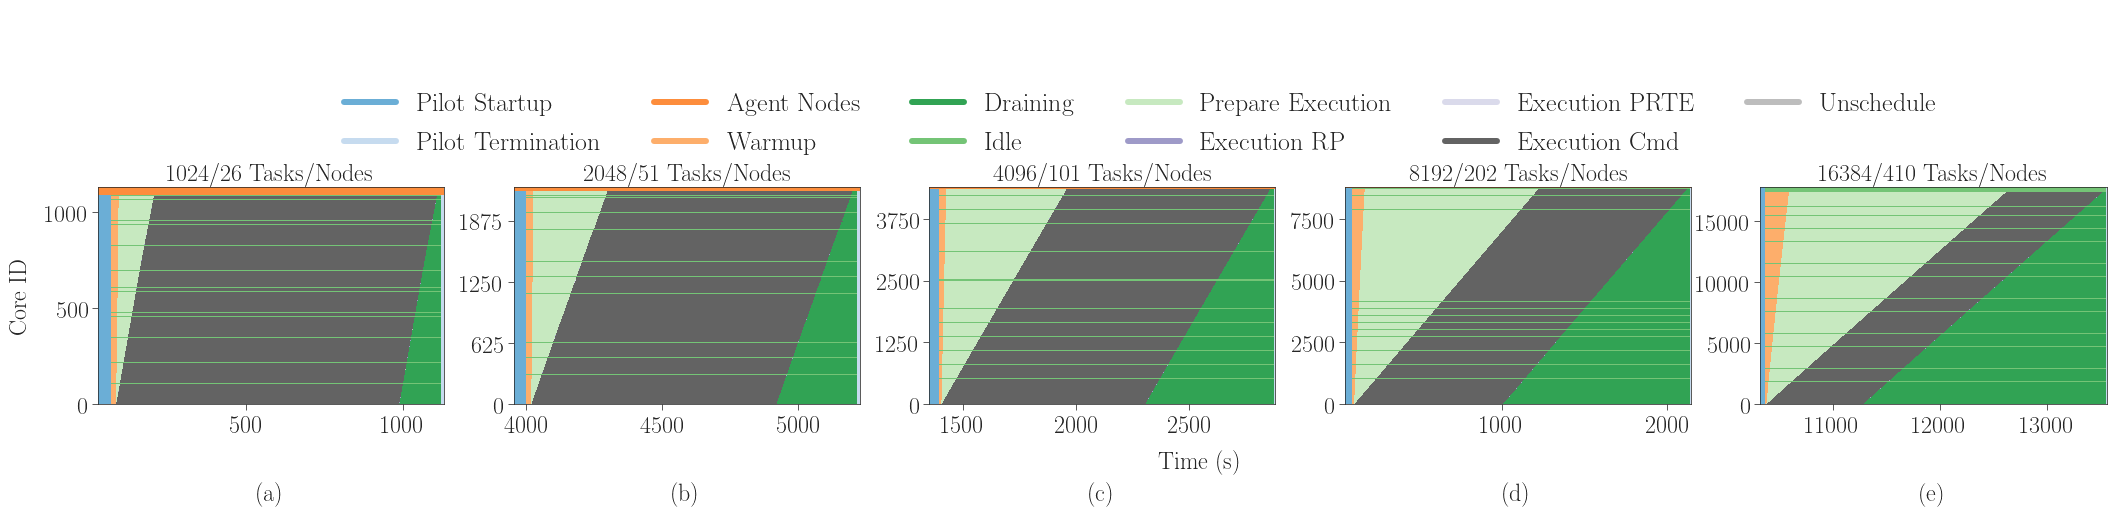

In [14]:
# core utilization over time (box plot)

xkeys = xkeys_exp4
provided = provided_exp4 
consumed = consumed_exp4
stats_rel = stats_rel_exp4

sids = [ 'rp.session.login4.mturilli1.018119.0001', # 1024
         'rp.session.login4.mturilli1.018127.0001', # 2048
         'rp.session.login4.mturilli1.018128.0000', # 4096
         'rp.session.login4.mturilli1.018122.0002', # 8192
         'rp.session.login4.mturilli1.018129.0000'] # 16384

fwidth = 36
fhight = 4
fig, axarr = plt.subplots(1,
                          len(sids),
                          sharex='col',
                          figsize=(fwidth, fhight))  # , sharey='row')

i = 0
j = 'a'
for sid in sids:

    ax = axarr[i]
    cmap = mpl.cm.get_cmap('tab20c')

    step = 1.0 / (len(metrics) + 1)
    this = step / 1.0
    legend = list()

    x_min = None
    x_max = None
    y_min = None
    y_max = None
    
    ax.title.set_text('%s/%s Tasks/Nodes' % (exp4_sessions.loc[sid].nunit, int(exp4_sessions.loc[sid].nnode)))

    for metric in metrics:

        color = cmap(this)
        this += step

        legend.append(mpl.lines.Line2D([0], [0], color=color, lw=6))

        if isinstance(metric, list):
            name = metric[0]
            parts = metric[1]
        else:
            name = metric
            parts = [metric]

        for part in parts:
            for uid in consumed[sid][part]:
                for block in consumed[sid][part][uid]:
                    orig_x = block[0]
                    orig_y = block[2] - 0.5
                    width = block[1] - block[0]
                    height = block[3] - block[2] + 1.0

                    if x_min is None:
                        x_min = orig_x
                    if x_max is None:
                        x_min = orig_x + width
                    if y_min is None:
                        y_min = orig_x
                    if y_max is None:
                        y_min = orig_x + height

                    x_min = min(x_min, orig_x)
                    y_min = min(y_min, orig_y)
                    x_max = max(x_max, orig_x + width)
                    y_max = max(y_max, orig_y + height)

                    patch = mpl.patches.Rectangle((orig_x, orig_y),
                                                  width, height,
                                                  facecolor=color,
                                                  edgecolor='black',
                                                  fill=True, lw=0.0)
                    ax.add_patch(patch)

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    
    ax.set_xlabel('(%s)' % j, labelpad=45)
    
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))

    i = i+1
    j = chr(ord(j) + 1)

# Add common axes lables
fig.text(0.09, 0.5, 'Core ID', va='center', rotation='vertical', fontsize=24)
fig.text(0.55, -0.1, 'Time (s)', ha='center', fontsize=24)
    
# Add legend
fig.legend(legend, 
           [m[0] for m in metrics], 
           loc='upper center', 
           bbox_to_anchor=(0.44, 1.55),
           fontsize=26,
           ncol=6)

plt.savefig('figures/paper_prrte_weak_scaling_ru.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_weak_scaling_ru.png', dpi=300, bbox_inches='tight')

In [15]:
# # core utilization over time (box plot)

# from itertools import chain
# consumed = dict(chain.from_iterable(d.iteritems() for d in (consumed_exp4, consumed_exp5)))

# sid = ['rp.session.login4.mturilli1.018129.0000', 'rp.session.login4.mturilli1.018136.0000'] # 16384
# exp45_sessions = pd.concat([exp4_sessions.loc[['rp.session.login4.mturilli1.018129.0000']], 
#                             exp5_sessions.loc[['rp.session.login4.mturilli1.018136.0000']]],
#                            sort=True)


# fwidth = 36
# fhight = 4
# fig, axarr = plt.subplots(1,
#                           len(sids),
#                           sharex='col',
#                           figsize=(fwidth, fhight))  # , sharey='row')

# i = 0
# j = 'a'
# for sid in sids:

#     ax = axarr[i]
#     cmap = mpl.cm.get_cmap('tab20c')

#     step = 1.0 / (len(metrics) + 1)
#     this = step / 1.0
#     legend = list()

#     x_min = None
#     x_max = None
#     y_min = None
#     y_max = None
    
#     ax.title.set_text('%s/%s Tasks/Nodes' % (exp45_sessions.loc[sid].nunit, int(exp45_sessions.loc[sid].nnode)))

#     for metric in metrics:

#         color = cmap(this)
#         this += step

#         legend.append(mpl.lines.Line2D([0], [0], color=color, lw=6))

#         if isinstance(metric, list):
#             name = metric[0]
#             parts = metric[1]
#         else:
#             name = metric
#             parts = [metric]

#         for part in parts:
#             for uid in consumed[sid][part]:
#                 for block in consumed[sid][part][uid]:
#                     orig_x = block[0]
#                     orig_y = block[2] - 0.5
#                     width = block[1] - block[0]
#                     height = block[3] - block[2] + 1.0

#                     if x_min is None:
#                         x_min = orig_x
#                     if x_max is None:
#                         x_min = orig_x + width
#                     if y_min is None:
#                         y_min = orig_x
#                     if y_max is None:
#                         y_min = orig_x + height

#                     x_min = min(x_min, orig_x)
#                     y_min = min(y_min, orig_y)
#                     x_max = max(x_max, orig_x + width)
#                     y_max = max(y_max, orig_y + height)

#                     patch = mpl.patches.Rectangle((orig_x, orig_y),
#                                                   width, height,
#                                                   facecolor=color,
#                                                   edgecolor='black',
#                                                   fill=True, lw=0.0)
#                     ax.add_patch(patch)

#     ax.set_xlim([x_min, x_max])
#     ax.set_ylim([y_min, y_max])
    
#     ax.set_xlabel('(%s)' % j, labelpad=45)
#     i = i+1
#     j = chr(ord(j) + 1)

# # Add common axes lables
# fig.text(0.09, 0.5, 'Core ID', va='center', rotation='vertical', fontsize=24)
# fig.text(0.55, -0.1, 'Time (s)', ha='center', fontsize=24)
    
# # Add legend
# fig.legend(legend, 
#            [m[0] for m in metrics], 
#            loc='upper center', 
#            bbox_to_anchor=(0.44, 1.55),
#            fontsize=26,
#            ncol=6)

# plt.savefig('figures/paper_prrte_weak_scaling_ru_optimized.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('figures/paper_prrte_weak_scaling_ru_optimized.png', dpi=300, bbox_inches='tight')

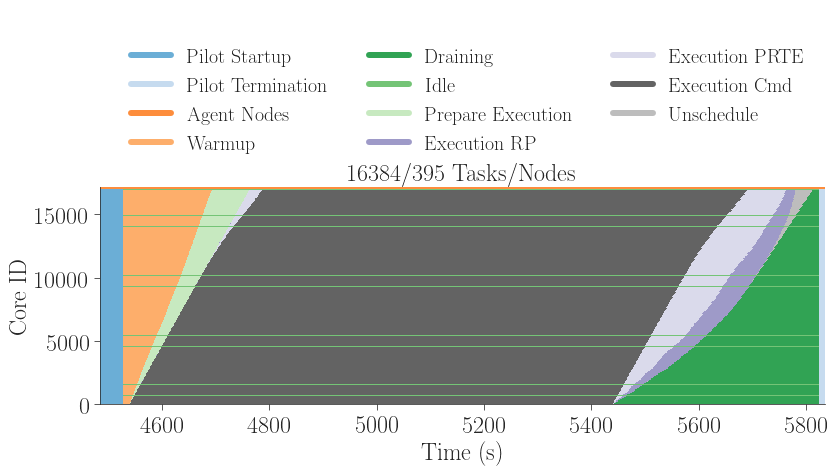

In [16]:
# core utilization over time (box plot)
sid = 'rp.session.login4.mturilli1.018136.0000' # 16384
consumed = consumed_exp5

fig, ax = fig_setup(figsize=(13,4))

cmap = mpl.cm.get_cmap('tab20c')

step = 1.0 / (len(metrics) + 1)
this = step / 1.0
legend = list()

x_min = None
x_max = None
y_min = None
y_max = None

ax.title.set_text('%s/%s Tasks/Nodes' % (exp5_sessions.loc[sid].nunit, int(exp5_sessions.loc[sid].nnode)))

for metric in metrics:

    color = cmap(this)
    this += step

    legend.append(mpl.lines.Line2D([0], [0], color=color, lw=6))

    if isinstance(metric, list):
        name = metric[0]
        parts = metric[1]
    else:
        name = metric
        parts = [metric]

    for part in parts:
        for uid in consumed[sid][part]:
            for block in consumed[sid][part][uid]:
                orig_x = block[0]
                orig_y = block[2] - 0.5
                width = block[1] - block[0]
                height = block[3] - block[2] + 1.0

                if x_min is None:
                    x_min = orig_x
                if x_max is None:
                    x_min = orig_x + width
                if y_min is None:
                    y_min = orig_x
                if y_max is None:
                    y_min = orig_x + height

                x_min = min(x_min, orig_x)
                y_min = min(y_min, orig_y)
                x_max = max(x_max, orig_x + width)
                y_max = max(y_max, orig_y + height)

                patch = mpl.patches.Rectangle((orig_x, orig_y),
                                              width, height,
                                              facecolor=color,
                                              edgecolor='black',
                                              fill=True, lw=0.0)
                ax.add_patch(patch)

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

ax.set_xlabel('Time (s)')
ax.set_ylabel('Core ID')

ax.yaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))

# Add legend
fig.legend(legend, 
       [m[0] for m in metrics], 
       loc='upper center', 
       bbox_to_anchor=(0.5, 1.54),
       fontsize=20,
       ncol=3)

plt.savefig('figures/paper_prrte_weak_scaling_ru_opt.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_weak_scaling_ru_opt.png', dpi=300, bbox_inches='tight')